In [1]:
import data_catalog
import tseries_mod
from utils_plot import plot_1ds

%matplotlib inline

In [2]:
data_catalog.set_catalog('experiments')

active catalog: experiments


In [3]:
varnames = ['STF_CFC11', 'STF_CFC12']

In [4]:
experiment = 'historical'
ds_expr_ann = tseries_mod.tseries_get_vars(varnames, 'ocn', experiment, freq='ann')

In [5]:
# add cummulate flux vars to datasets
for ds in [ds_expr_ann]:
    for varname in varnames:
        da = ds[varname].cumsum(dim='time', keep_attrs=True)
        da.attrs['units'] = 'Gg'
        ds[varname+'_CUM'] = da
#     print(ds)

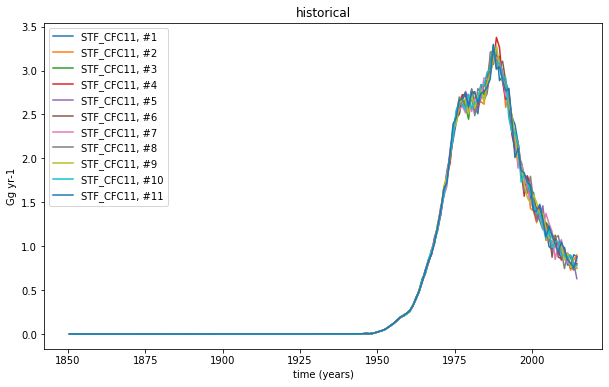

In [6]:
plot_1ds(ds_expr_ann, ['STF_CFC11'], title=experiment, region_val='Global');

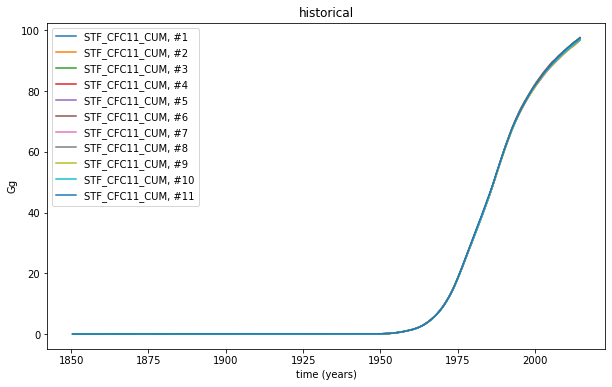

In [7]:
plot_1ds(ds_expr_ann, ['STF_CFC11_CUM'], title=experiment, region_val='Global');

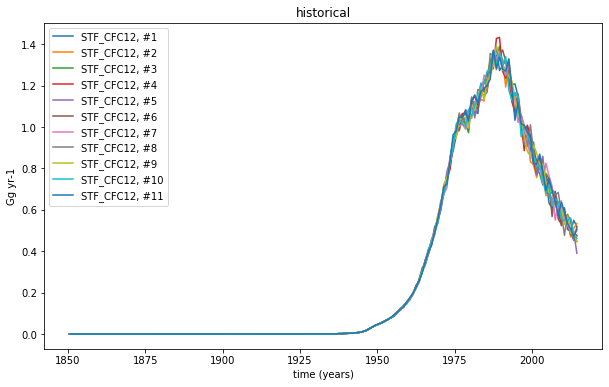

In [8]:
plot_1ds(ds_expr_ann, ['STF_CFC12'], title=experiment, region_val='Global');

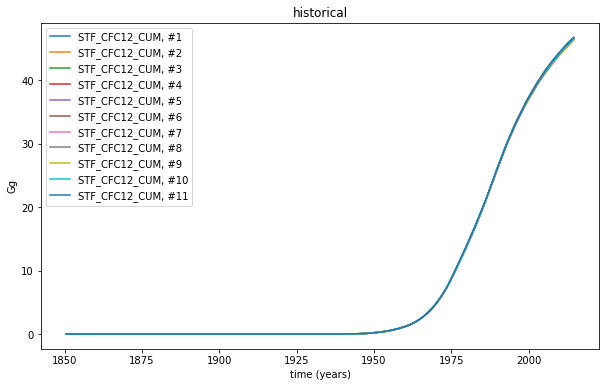

In [9]:
plot_1ds(ds_expr_ann, ['STF_CFC12_CUM'], title=experiment, region_val='Global');